<img src="perceptrón.jpg" alt="Texto alternativo" width="50%"><img src="perceptrón2.jpg" alt="Texto alternativo" width="50%">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

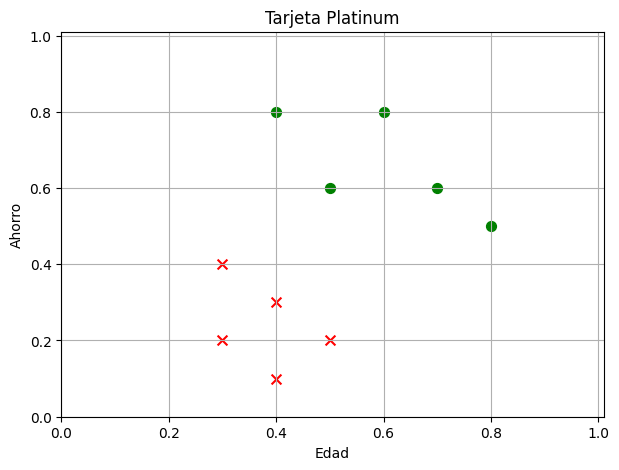

array([[0.3, 0.4],
       [0.4, 0.3],
       [0.3, 0.2],
       [0.4, 0.1],
       [0.5, 0.2]])

In [153]:
# Datos de 10 personas
X=np.array([[0.3,0.4 ],[0.4,0.3],[0.3,0.2],[0.4,0.1],[0.5,0.2],[0.4,0.8],[0.6,0.8],[0.5,0.6],[0.7,0.6],[0.8,0.5]])
y=np.array([0,0,0,0,0,1,1,1,1,1])

# Grafica de 10 personas
plt.figure(figsize=(7,5))
plt.title("Tarjeta Platinum")
plt.scatter(X[y==0].T[0],X[y==0].T[1],marker="x",s=50,color="Red",label="Denegada")
plt.scatter(X[y==1].T[0],X[y==1].T[1],marker="o",s=50,color="Green",label="Aprobada")
plt.xlabel("Edad")
plt.ylabel("Ahorro")
plt.xlim((0,1.01))
plt.ylim((0,1.01))
plt.grid()
plt.show()
X[y==0]

In [154]:
def activacion(w,x,b):
    if np.dot(w,x)+b>0:
        return 1
    return 0

w=np.random.uniform(-1,1,size=2)
b=np.random.uniform(-1,1)

w,b,activacion(w,[0.5,0.4],b)

(array([ 0.22385822, -0.60438528]), -0.8171981644055901, 0)

In [170]:
tasa=0.01
epocas=100
w=np.random.uniform(-1,1,size=2)
b=np.random.uniform(-1,1)

for e in range(epocas):
    error2=0
    for i,x in enumerate(X):
        y_p=activacion(w,x,b)
        error=y[i]-y_p
        error2+=error**2
        w+=tasa*error*x
        b+=tasa*error
    print(f'{error2}',end='')

activacion(w,[0.6,0.5],b)


5555567788777777766766765565545443222222223222221222100000000000000000000000000000000000000000000000

1

#### Armado de clase perceptron.

In [156]:
import numpy as np

class Fperceptron:

    def __init__(self, epocas=100, tasa=0.01):
        self.epocas = epocas
        self.tasa = tasa
    
    def activacion(self, w, x, b):
        if np.dot(w, x) + b > 0:
            return 1
        return 0
    
    def fit(self, X, y):
        nx = X.shape[1]
        w = np.random.uniform(-1, 1, size=nx)
        b = np.random.uniform(-1, 1)

        for e in range(self.epocas):
            error2 = 0
            for i, x in enumerate(X):
                y_p = self.activacion(w, x, b)
                error = y[i] - y_p
                error2 += error**2
                w += self.tasa * error * x
                b += self.tasa * error
        return self
    
    def predict(self, X):
        yp = []
        for x in X:
            yp.append(self.activacion(w, x, b))
        return yp

In [157]:
from sklearn.linear_model import Perceptron
perceptron1=Fperceptron(epocas=200,tasa=0.01).fit(X,y)
yp=perceptron1.predict([[0.5,0.8],[0.4,0.8],[0.2,0.2],[0.4,0.45]])
perceptron2 = Perceptron(max_iter=200).fit(X,y)
yp2=perceptron2.predict([[0.5,0.8],[0.4,0.8],[0.2,0.2],[0.4,0.45]])
yp,yp2


([1, 1, 0, 1], array([1, 1, 0, 0]))

In [200]:
import numpy as np

class Fperceptron:

    def __init__(self, epocas=100, tasa=0.01, shuffle=True):
        self.epocas = epocas
        self.tasa = tasa
        self.shuffle = shuffle
        self.w=None
        self.b=None
    
    def activacion(self, w, x, b):
        if np.dot(w, x) + b > 0:
            return 1
        return 0
    
    def fit(self, X, y):
        nx = X.shape[1]
        self.w = np.random.uniform(-1, 1, size=nx)
        self.b = np.random.uniform(-1, 1)

        for e in range(self.epocas):
            error2 = 0
            if self.shuffle:
                # Mezclar los datos
                indices = np.random.permutation(len(X))
                X = X[indices]
                y = y[indices]
            for i, x in enumerate(X):
                y_p = self.activacion(self.w, x, self.b)
                error = y[i] - y_p
                error2 += error**2
                self.w += self.tasa * error * x
                self.b += self.tasa * error
        return self
    
    def predict(self, X):
        yp = []
        for x in X:
            yp.append(self.activacion(self.w, x, self.b))
        return np.array(yp)

In [215]:
from sklearn.linear_model import Perceptron
perceptron1=Fperceptron(epocas=200,tasa=0.01).fit(X,y)
yp=perceptron1.predict([[0.5,0.8],[0.4,0.8],[0.2,0.2],[0.4,0.45]])
perceptron2 = Perceptron(max_iter=200).fit(X,y)
yp2=perceptron2.predict([[0.5,0.8],[0.4,0.8],[0.2,0.2],[0.4,0.45]])
yp,yp2

(array([1, 1, 0, 0]), array([1, 1, 0, 0]))

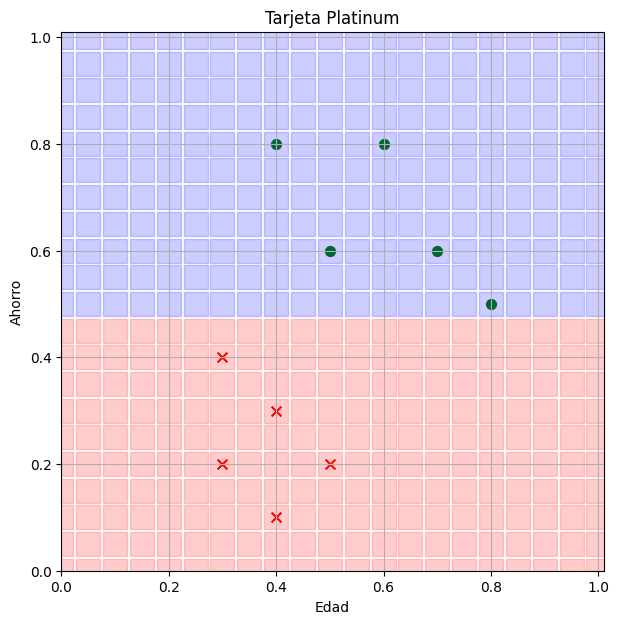

In [216]:
# Crear un array de dos componentes que va de 0 a 1 en incrementos de 0.05
componentes = np.arange(0., 1.05, 0.05)

# Crear el array final de arrays de dos componentes
Xtest = np.array([[a, b] for a in componentes for b in componentes])
ytest=perceptron1.predict(Xtest)

plt.figure(figsize=(7,7))
plt.title("Tarjeta Platinum")
plt.scatter(X[y==0].T[0],X[y==0].T[1],marker="x",s=50,color="Red",label="Denegada")
plt.scatter(X[y==1].T[0],X[y==1].T[1],marker="o",s=50,color="Green",label="Aprobada")
plt.scatter(Xtest[ytest==0].T[0],Xtest[ytest==0].T[1],marker="s",s=320,color="Red",alpha=0.2,)
plt.scatter(Xtest[ytest==1].T[0],Xtest[ytest==1].T[1],marker="s",s=320,color="Blue",alpha=0.2)
plt.xlabel("Edad")
plt.ylabel("Ahorro")
plt.xlim((0,1.01))
plt.ylim((0,1.01))
plt.grid()
plt.show()

#### Otro Perceptron

In [32]:
def X_al(n,p):
    x=np.random.uniform(-1,1,size=(n, p))
    return x

In [31]:
a=X_al(5,1)
b=X_al(1,5)
a @ b
a,a+1

(array([[-0.55595539],
        [-0.00944325],
        [-0.75416541],
        [ 0.26825525],
        [-0.19970654]]),
 array([[0.44404461],
        [0.99055675],
        [0.24583459],
        [1.26825525],
        [0.80029346]]))

#### Perceptron

In [2]:
class Fper:
    def __init__(self,p,fact):
        self.p=p
        self.fact=fact
        self.w=np.random.uniform(-1,1,size=(p, 1))
        self.b=0.0
    
    def predict(self,X):
        yp=self.fact(X @ self.w + self.b,'relu')
        return yp
    
    def fit(self,X,y,epocas=100):
        for i in range(epocas):
            yp=[]
            for j,x in enumerate(X):
                ypj=self.predict(x)
                yp.append(ypj)
                e=(y[j]-ypj)*0.01
                self.w=self.w+x[:,None]*e
                self.b=self.b+e
        return X,y,yp,e,self.w

In [30]:
def fact(z, op,**kwargs):
    funciones_activacion = {
        'elu': elu,
        'leaky_relu': leaky_relu,
        'relu': relu,
        'sigmoid': sigmoid,
        'softplus': softplus,
        'softmax': softmax,
        'swish': swish,
        'tanh': tanh
    }
    assert op in funciones_activacion, f"Función de activación no válida. Por favor, elija entre {list(funciones_activacion.keys())}."
    return funciones_activacion[op](z,**kwargs)

def elu(z, alpha=1.0):
    return np.where(z > 0, z, alpha * (np.exp(z) - 1))

def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softplus(z):
    return np.log(1 + np.exp(z))

def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z)

def swish(z):
    return z * sigmoid(z)

def tanh(z):
    return np.tanh(z)

In [24]:
zz=np.array([-1.,2.,3.,-0.01,1.1,0.001,0.2,0.5,-0.5,-3.])
fact(zz,'leaky_relu',alpha=2)

array([-2.0e+00,  2.0e+00,  3.0e+00, -2.0e-02,  1.1e+00,  1.0e-03,
        2.0e-01,  5.0e-01, -1.0e+00, -6.0e+00])

In [120]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[1]])
X,y

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [1]]))

In [186]:
fperceptron=Fper(2,fact)

In [187]:
fperceptron.fit(X,y,epocas=100)

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [1]]),
 [array([0.48600576]),
  array([0.92261767]),
  array([0.64091163]),
  array([1.0903392])],
 array([-0.00090339]),
 array([[0.1616796],
        [0.4413424]]))

In [195]:
fperceptron.predict([0,1])

array([0.92594942])

In [48]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
prob=X_al(5,3)
prob

array([[-0.38159462,  0.62520284, -0.05278895],
       [ 0.46477197,  0.53654719,  0.56501423],
       [ 0.46794144,  0.61214151, -0.42724197],
       [ 0.36633094,  0.2963245 , -0.75143007],
       [ 0.4014423 , -0.22418163, -0.19825772]])

In [56]:
prob[[1,2,3],np.arange(3)]

array([ 0.46477197,  0.61214151, -0.75143007])

In [58]:
a=np.array([1,2,3])
b=np.array([2,3,4])
a+b

array([3, 5, 7])

In [87]:
a=np.random.uniform(-1,1,size=(5, 1))
b=np.random.uniform(-1,1,size=(5,2))
b.T@a

array([[-0.43257979],
       [-0.07429665]])